In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization,Dense
from keras.preprocessing.text import one_hot
import tensorflow as tf

In [10]:
df=pd.read_csv("train.csv")

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [13]:
y=df.label.values
x=df.iloc[:,1:].values

In [14]:
x.shape

(27455, 784)

In [15]:
x=x.reshape(x.shape[0],28,28)

In [16]:
from PIL import Image

/Users/sahilsagar/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


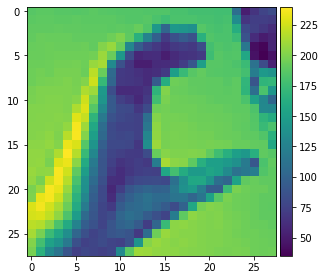

In [17]:
from skimage import io
import numpy as np
data=np.random.randn(5,2)
io.imshow(x[2])

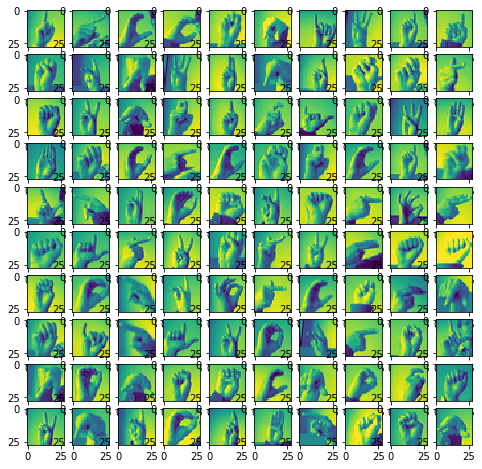

In [18]:
fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x[i])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [20]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [21]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [22]:
from keras.utils.np_utils import to_categorical   

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [132]:
model=Sequential()
model.add(Conv2D(50,(5,5),activation='relu',padding='same',strides=1,input_shape=(28,28,1)))
model.add(Conv2D(30,(5,5),activation='relu',padding='same',strides=1))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(50,(5,5),activation='relu',padding='same',strides=1))
model.add(Conv2D(50,(5,5),activation='relu',padding='same',strides=1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(.20))
model.add(Flatten())
model.add(Dense(25,activation='softmax'))

In [133]:
# Compile Model. 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [134]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=50)

Train on 20591 samples, validate on 6864 samples
Epoch 1/10
20591/20591 [==============================] - 152s 7ms/step - loss: 0.7615 - accuracy: 0.7668 - val_loss: 0.0291 - val_accuracy: 0.9929
Epoch 2/10
20591/20591 [==============================] - 151s 7ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
20591/20591 [==============================] - 177s 9ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 4/10
20591/20591 [==============================] - 170s 8ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 5/10
20591/20591 [==============================] - 152s 7ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0129 - val_accuracy: 0.9959
Epoch 6/10
20591/20591 [==============================] - 151s 7ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 4.0333e-04 - val_accuracy: 1.0000
Epoch 7/10
20591/20591 [==============================] - 1

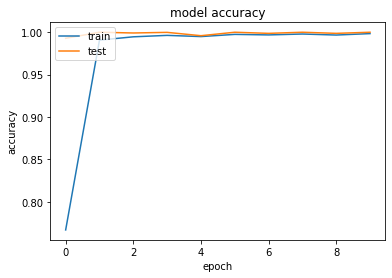

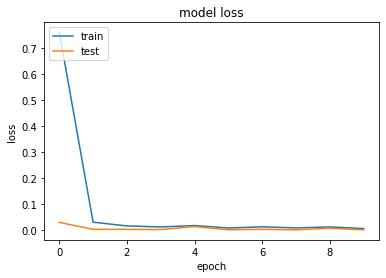

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [142]:
model.save("Sign_language.h5")

# Real Time Detection

In [3]:

from keras.models import load_model
import cv2 
import numpy as np

dic={1:"A",
     2:"B",
     3:"C",
     4:"D",
     5:"E",
     6:"F"
     ,7:"G",
     8:"H",
     9:"I",
     10:"K",
     11:"L",
     12:"M",
     13:"N",
     14:"O",
     15:"P",
     16:"Q",17:"R"
     ,18:"S",19:"T"
     ,20:"U",21:"V",
     22:"W",23:"X"
     ,24:"Y"}

model=load_model("Sign_language.h5")

def pre(image):
    prediction=model.predict(image)
    
    return prediction


camera=cv2.VideoCapture(0)

while(True):
    
    ret,frame=camera.read()
    
    frame = cv2.flip(frame, 1)
    
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    
    
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resize=cv2.resize(gray,(28,28))
    resized=np.asarray(resize)
    rep=resized.reshape((28,28,1))
    print(rep.shape)
    x = np.expand_dims(rep, axis=0)
    images = np.vstack([x])
    result=pre(images)
    print(result.argmax())
    cv2.putText(frame,str(dic[result.argmax()]),(10, 120),cv2.FONT_HERSHEY_COMPLEX,4,(255,255,255),2,cv2.LINE_AA)
    cv2.imshow('video', frame)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break


        
camera.release() 
# close all windows 
cv2.destroyAllWindows() 

(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
10
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
10
(28, 28, 1)
22
(28, 28, 1)
10
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
10
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1

(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
6
(28, 28, 1)
8
(28, 28, 1)
22
(28, 28, 1)
15
(28, 28, 1)
10
(28, 28, 1)
22
(28, 28, 1)
24
(28, 28, 1)
24
(28, 28, 1)
6
(28, 28, 1)
6
(28, 28, 1)
6
(28, 28, 1)
6
(28, 28, 1)
6
(28, 28, 1)
6
(28, 28, 1)
13
(28, 28, 1)
13
(28, 28, 1)
13
(28, 28, 1)
24
(28, 28, 1)
8
(28, 28, 1)
8
(28, 28, 1)
24
(28, 28, 1)
24
(28, 28, 1)
8
(28, 28, 1)
13
(28, 28, 1)
13
(28, 28, 1)
13
(28, 28, 1)
7
(28, 28, 1)
7
(28, 28, 1)
24
(28, 28, 1)
7
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
23
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 1)
24
(28, 28, 1)
24
(28, 28, 1)
15
(28, 28, 1)
15
(28, 28, 

22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
22
(28, 28, 1)
16
(28, 28, 1)
22
(28, 28, 1)
0


KeyError: 0